### Importeren libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

### Inladen Vooraf Getraind Model

In [17]:
model = VGG16(weights='imagenet') #gelabelde afbeeldingen

### Laden en voorbereiden van een batch

In [18]:
def load_and_process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize afbeelding naar 224x224
    img_array = image.img_to_array(img)  # Converteer naar NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Voeg batch-dimensie toe (1, 224, 224, 3)
    img_array = preprocess_input(img_array)  # Preprocessing voor VGG16
    return img_array, img  # Geef zowel de array als de originele afbeelding terug

In [19]:
#image_folder = 'batch_easy'
image_folder = 'batch_hard'
image_files = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.endswith(('.jpg', '.png', '.jpeg'))]

batch_images = []
original_images = []

for img_path in image_files:
    img_array, original_img = load_and_process_image(img_path)
    batch_images.append(img_array)
    original_images.append(original_img)


### Voorspel

Vorm van de batch: (5, 224, 224, 3)
1/1 [==============================] - 0s 236ms/step


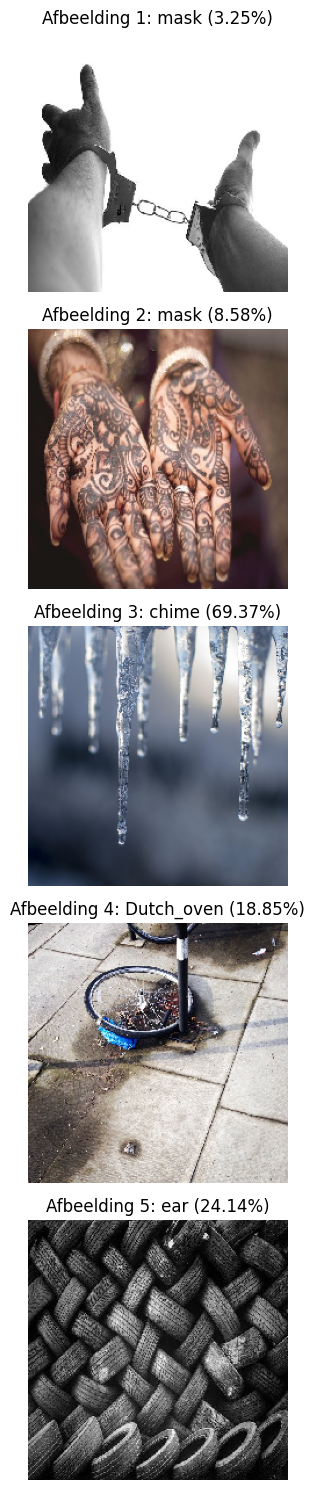

In [20]:
batch_images_array = np.vstack(batch_images)
print("Vorm van de batch:", batch_images_array.shape)  
predictions = model.predict(batch_images_array)
plt.figure(figsize=(15, len(image_files) * 3)) 

for i, pred in enumerate(predictions):
    decoded = decode_predictions(np.expand_dims(pred, axis=0), top=1)[0][0]  # Alleen eerste voorspelling

    best_label = decoded[1]  
    best_score = decoded[2]  
    prediction_text = f"{best_label} ({best_score:.2%})"
    plt.subplot(len(image_files), 1, i + 1)
    plt.imshow(original_images[i])
    plt.title(f"Afbeelding {i+1}: {prediction_text}")
    plt.axis("off")

plt.tight_layout()
plt.show()
